In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/AndrsGzRo/mx-traffic-accidents-eda-ml/refs/heads/main/data-2025-11-24.csv'
df_raw = pd.read_csv(url)
# First 5 rows
df_raw.head(5)

,entidad_federativa,mes,accidentes,danios_materiales_millones,heridos,muertos
0,Aguascalientes,enero,17,0.7380,21,3
1,Aguascalientes,febrero,15,0.7130,16,2
2,Aguascalientes,marzo,14,0.3743,10,1
3,Aguascalientes,abril,13,0.4145,7,1
4,Aguascalientes,mayo,13,0.5470,15,0


## Cleaning and Preprocessing

In [3]:
def info_df(df):
    print('---------General information of the  Dataframe---------')
    print(df.info())
    print('---------Dataframe stats---------')
    print(df.describe())
    print('---------Null Values---------')
    print(df.isnull().sum().sort_values(ascending=False))
    print('---------Unique Values---------')
    print(df.nunique())

info_df(df_raw)

---------General information of the  Dataframe---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   entidad_federativa          384 non-null    object 
 1   mes                         384 non-null    object 
 2   accidentes                  384 non-null    int64  
 3   danios_materiales_millones  384 non-null    float64
 4   heridos                     384 non-null    int64  
 5   muertos                     384 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 18.1+ KB
None
---------Dataframe stats---------
       accidentes  danios_materiales_millones     heridos     muertos
count  384.000000                  384.000000  384.000000  384.000000
mean    30.919271                    2.763792   23.190104    7.601562
std     20.084579                    2.224584   17.431636    6.460573
mi

In [4]:
df = df_raw.copy()

## Exploratory Data Analysis

In [5]:
sns.set_theme(style="darkgrid",context='notebook')

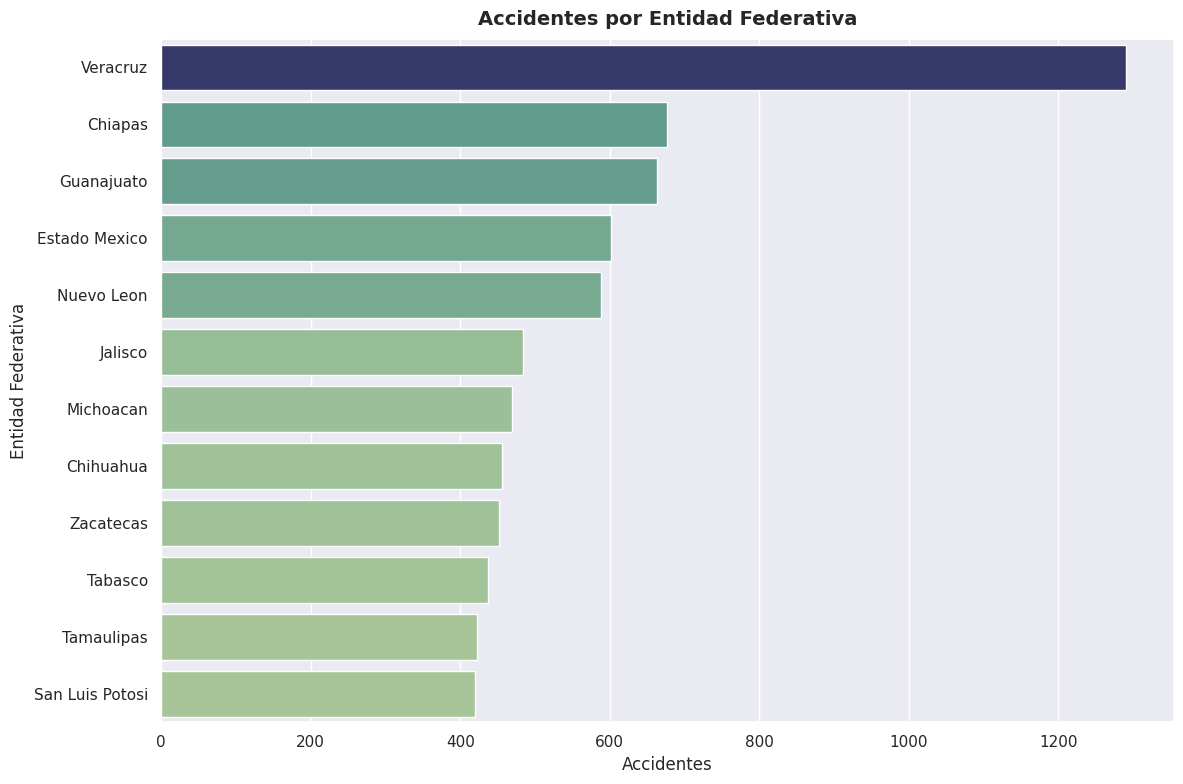

In [6]:
df_entidad_acc = (
    df.groupby('entidad_federativa')['accidentes'].sum().
    reset_index().sort_values(by='accidentes',ascending=False)
)
plt.figure(figsize=(12,8))
sns.barplot(
    data=df_entidad_acc.head(12),
    y='entidad_federativa',
    x='accidentes',
    palette='crest',
    hue='accidentes',
    legend=False
)
plt.xlabel('Accidentes')
plt.ylabel('Entidad Federativa')
plt.title('Accidentes por Entidad Federativa',fontsize=14,fontweight='bold',pad=10)
plt.tight_layout()
plt.show()

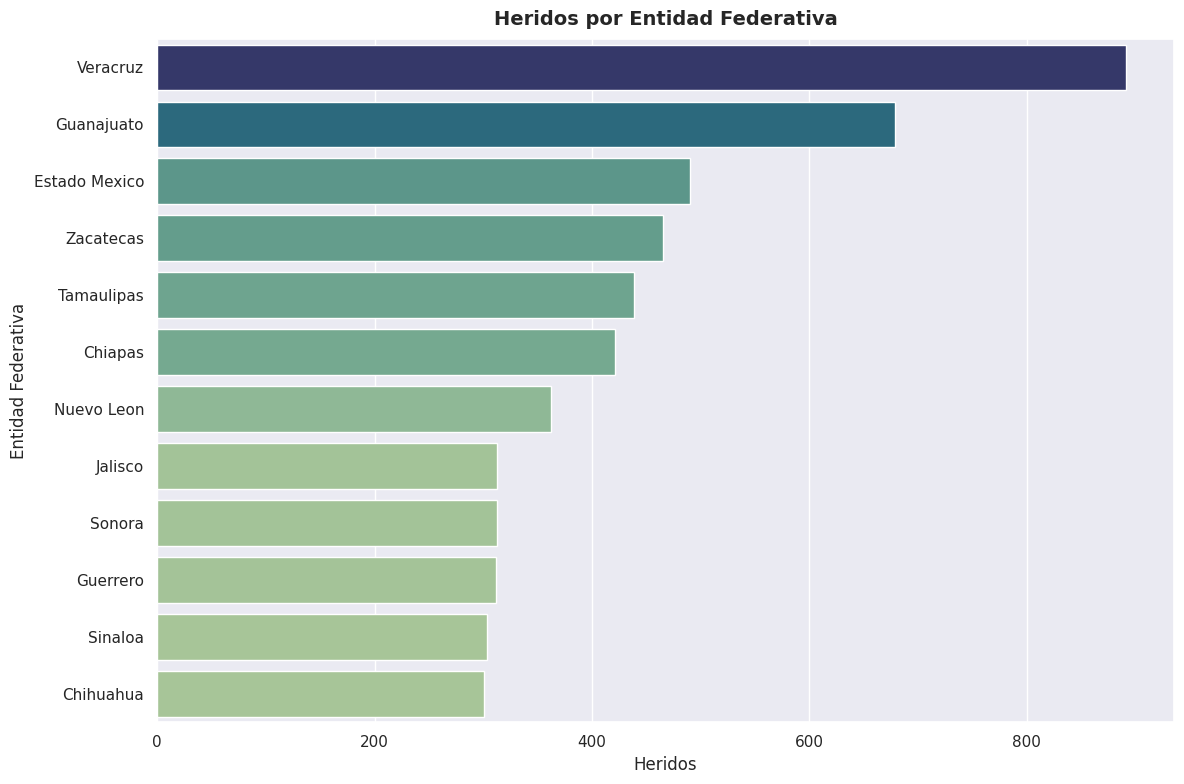

In [7]:
df_entidad_h = (
    df.groupby('entidad_federativa')['heridos'].sum().
    reset_index().sort_values(by='heridos',ascending=False)
)
plt.figure(figsize=(12,8))
sns.barplot(
    data=df_entidad_h.head(12),
    y='entidad_federativa',
    x='heridos',
    palette='crest',
    hue='heridos',
    legend=False
)
plt.xlabel('Heridos')
plt.ylabel('Entidad Federativa')
plt.title('Heridos por Entidad Federativa',fontsize=14,fontweight='bold',pad=10)
plt.tight_layout()
plt.show()

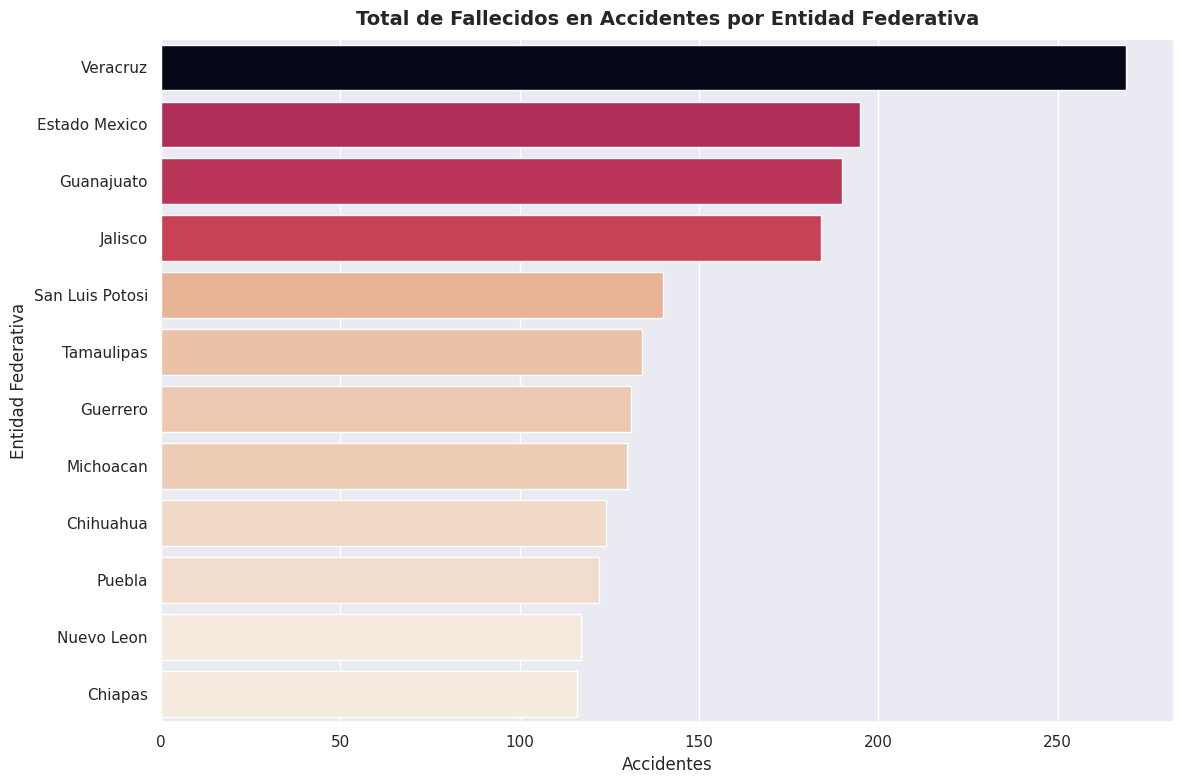

In [64]:
df_entidad_mu = (
    df.groupby('entidad_federativa')['muertos'].sum().
    reset_index().sort_values(by='muertos',ascending=False)
)
plt.figure(figsize=(12,8))
sns.barplot(
    data=df_entidad_mu.head(12),
    y='entidad_federativa',
    x='muertos',
    palette='rocket_r',
    hue='muertos',
    legend=False
)
plt.xlabel('Accidentes')
plt.ylabel('Entidad Federativa')
plt.title('Total de Fallecidos en Accidentes por Entidad Federativa',
          fontsize=14,fontweight='bold',pad=10)
plt.tight_layout()
plt.show()

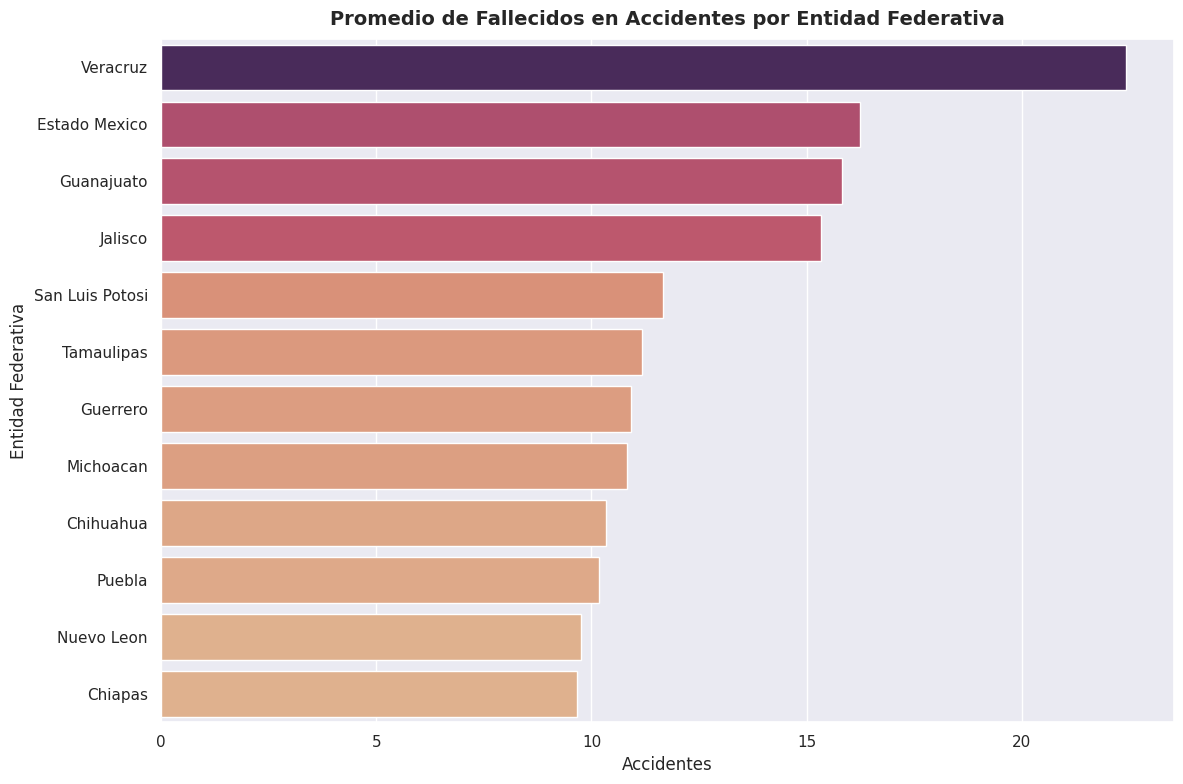

In [61]:
df_entidad_mortal = (
    df.groupby('entidad_federativa')['muertos'].mean().
    reset_index().sort_values(by='muertos',ascending=False)
)
plt.figure(figsize=(12,8))
sns.barplot(
    data=df_entidad_mortal.head(12),
    y='entidad_federativa',
    x='muertos',
    palette='flare',
    hue='muertos',
    legend=False
)
plt.xlabel('Accidentes')
plt.ylabel('Entidad Federativa')
plt.title('Promedio de Fallecidos en Accidentes por Entidad Federativa',
          fontsize=14,fontweight='bold',pad=10)
plt.tight_layout()
plt.show()

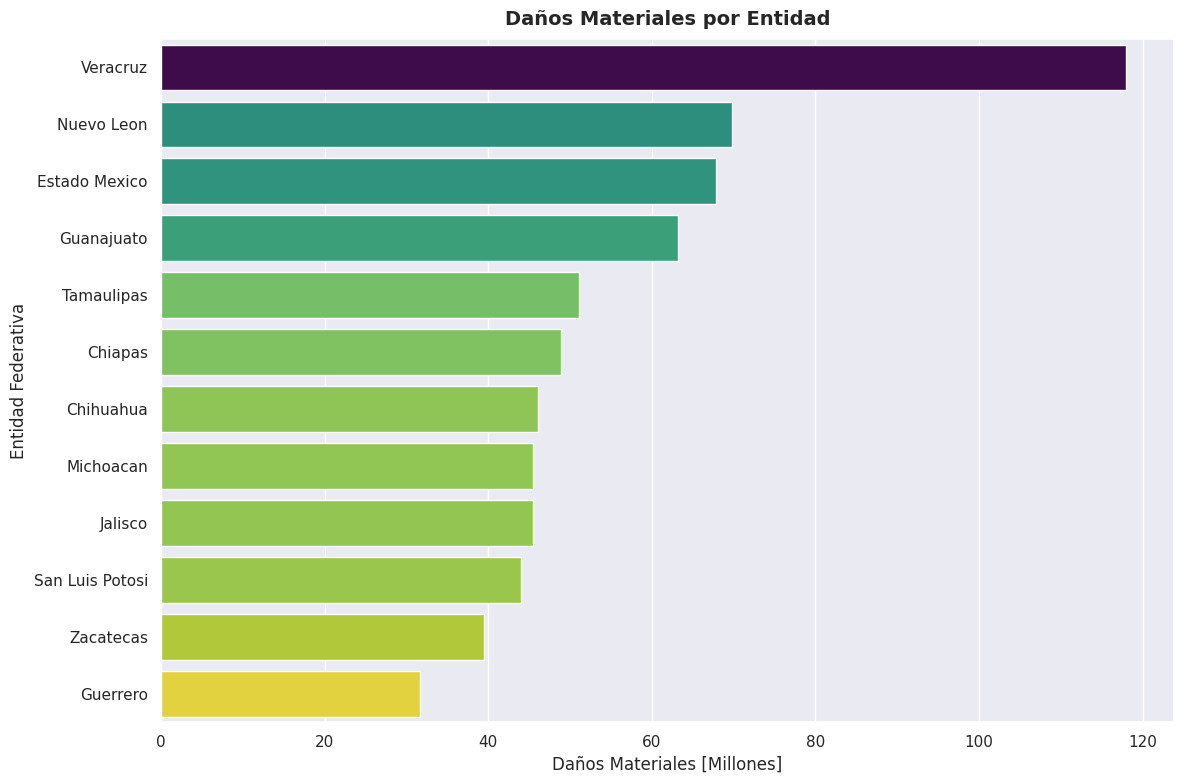

In [9]:
df_entidad_da = (
    df.groupby('entidad_federativa')['danios_materiales_millones'].sum().
    reset_index().sort_values(by='danios_materiales_millones',ascending=False)
)
plt.figure(figsize=(12,8))
sns.barplot(
    data=df_entidad_da.head(12),
    y='entidad_federativa',
    x='danios_materiales_millones',
    palette='viridis_r',
    hue='danios_materiales_millones',
    legend=False
)
plt.xlabel('Daños Materiales [Millones]')
plt.ylabel('Entidad Federativa')
plt.title('Daños Materiales por Entidad',
          fontsize=14,fontweight='bold',pad=10)
plt.tight_layout()
plt.show()

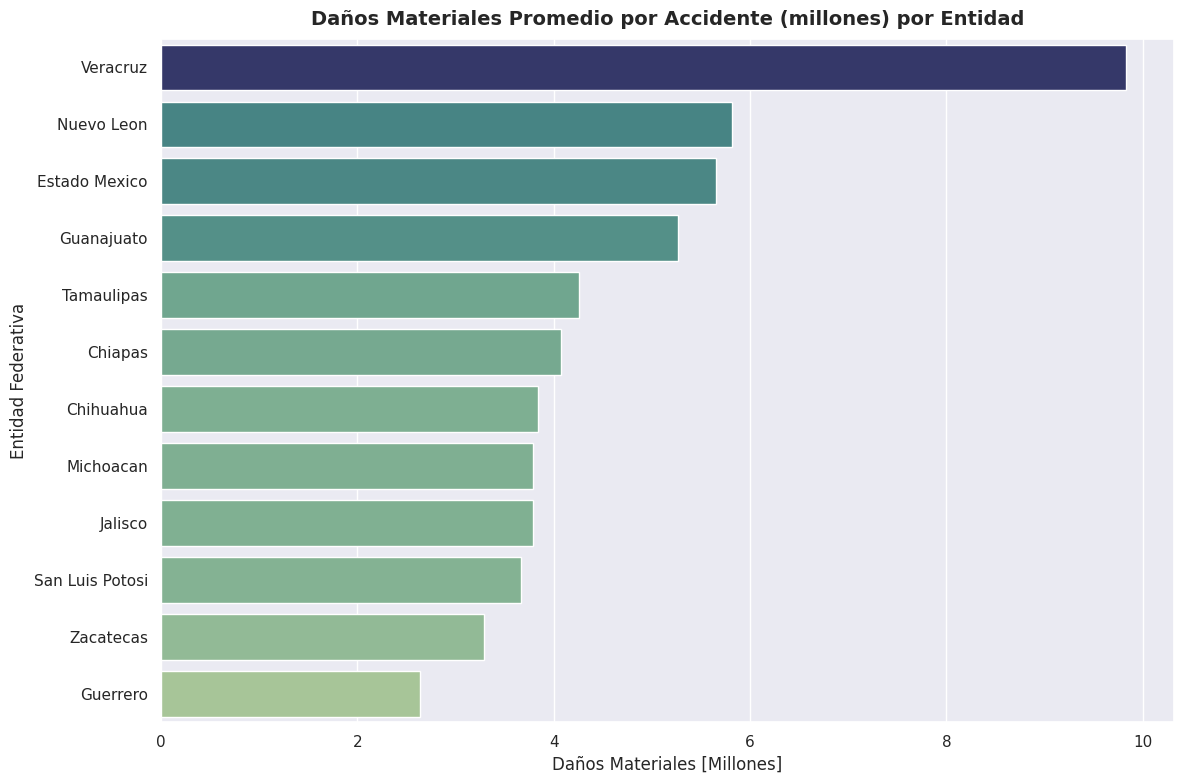

In [65]:
df_entidad_da_prom = (
    df.groupby('entidad_federativa')['danios_materiales_millones'].mean().
    reset_index().sort_values(by='danios_materiales_millones',ascending=False)
)
plt.figure(figsize=(12,8))
sns.barplot(
    data=df_entidad_da_prom.head(12),
    y='entidad_federativa',
    x='danios_materiales_millones',
    palette='crest',
    hue='danios_materiales_millones',
    legend=False
)
plt.xlabel('Daños Materiales [Millones]')
plt.ylabel('Entidad Federativa')
plt.title('Daños Materiales Promedio por Accidente (millones) por Entidad',
          fontsize=14,fontweight='bold',pad=10)
plt.tight_layout()
plt.show()

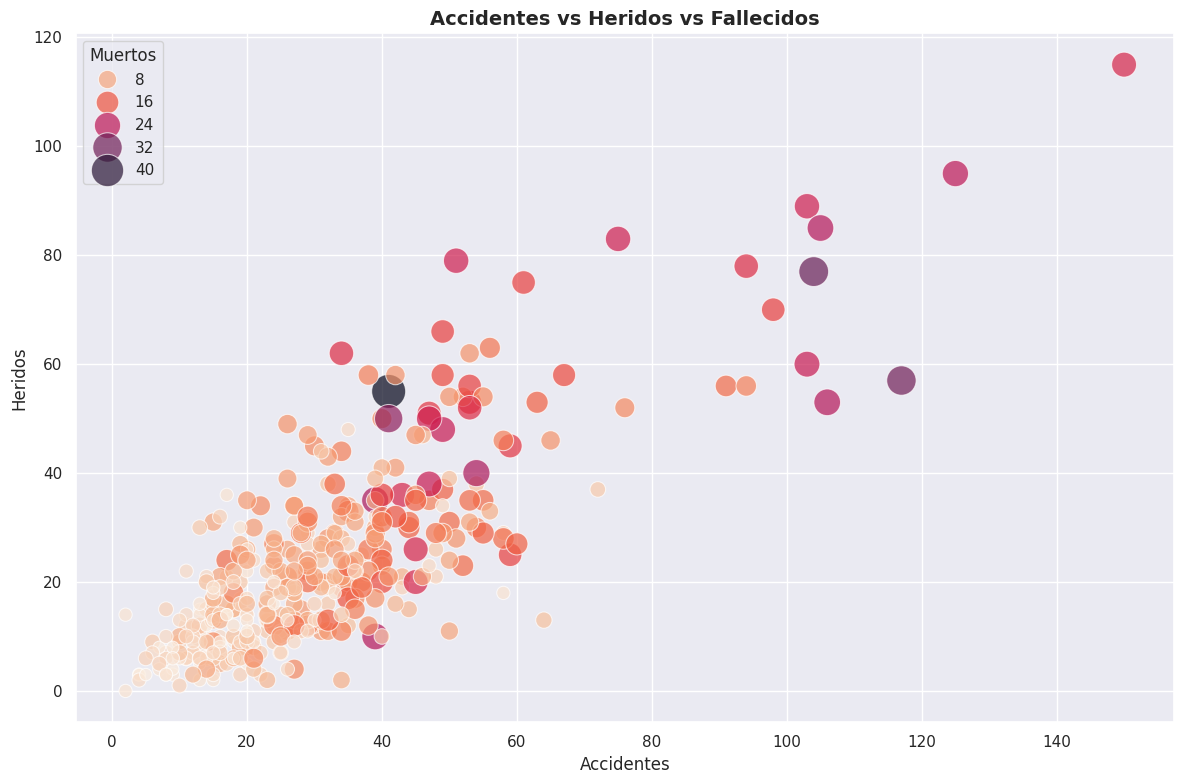

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df,
    x='accidentes',
    y='heridos',
    size='muertos',
    hue='muertos',
    sizes=(80,600),
    palette='rocket_r',
    legend='brief',
    alpha=0.7
)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[1:],labels=labels[1:],title='Muertos',loc=2)
plt.xlabel('Accidentes')
plt.ylabel('Heridos')
plt.title('Accidentes vs Heridos vs Fallecidos',fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()


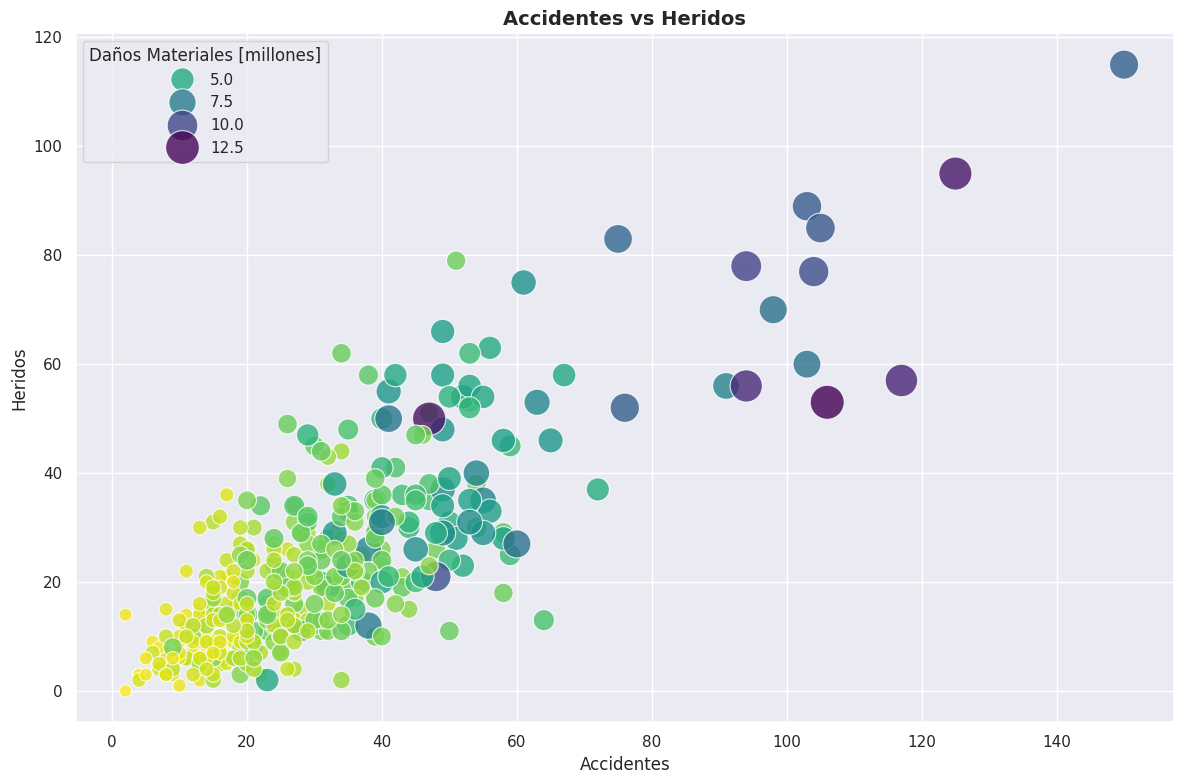

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df,
    x='accidentes',
    y='heridos',
    size='danios_materiales_millones',
    hue='danios_materiales_millones',
    sizes=(80,600),
    palette='viridis_r',
    legend='brief',
    alpha=0.8
)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[1:],labels=labels[1:],title='Daños Materiales [millones]',loc=2)
plt.xlabel('Accidentes')
plt.ylabel('Heridos')
plt.title('Accidentes vs Heridos',fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()


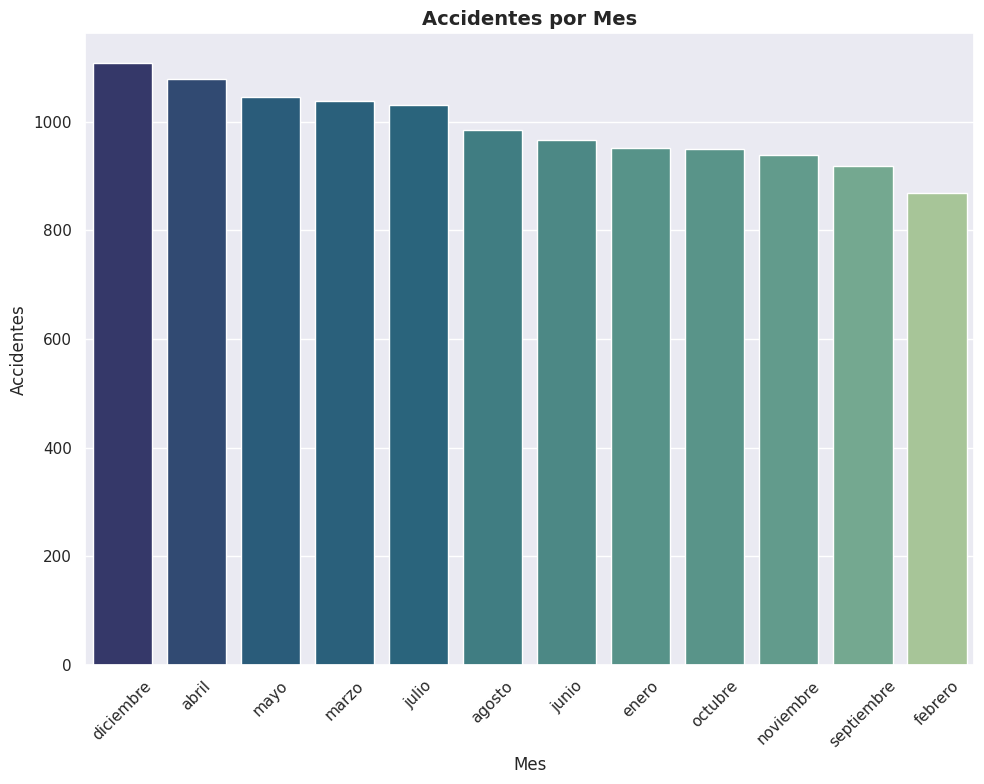

In [12]:
df_mes = (
    df.groupby('mes')['accidentes'].sum().
    reset_index().sort_values(by='accidentes',ascending=False)
)
plt.figure(figsize=(10,8))
sns.barplot(
    data=df_mes,
    x='mes',
    y='accidentes',
    palette='crest',
    hue='accidentes',
    legend=False
)
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Accidentes')
plt.title('Accidentes por Mes',fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()

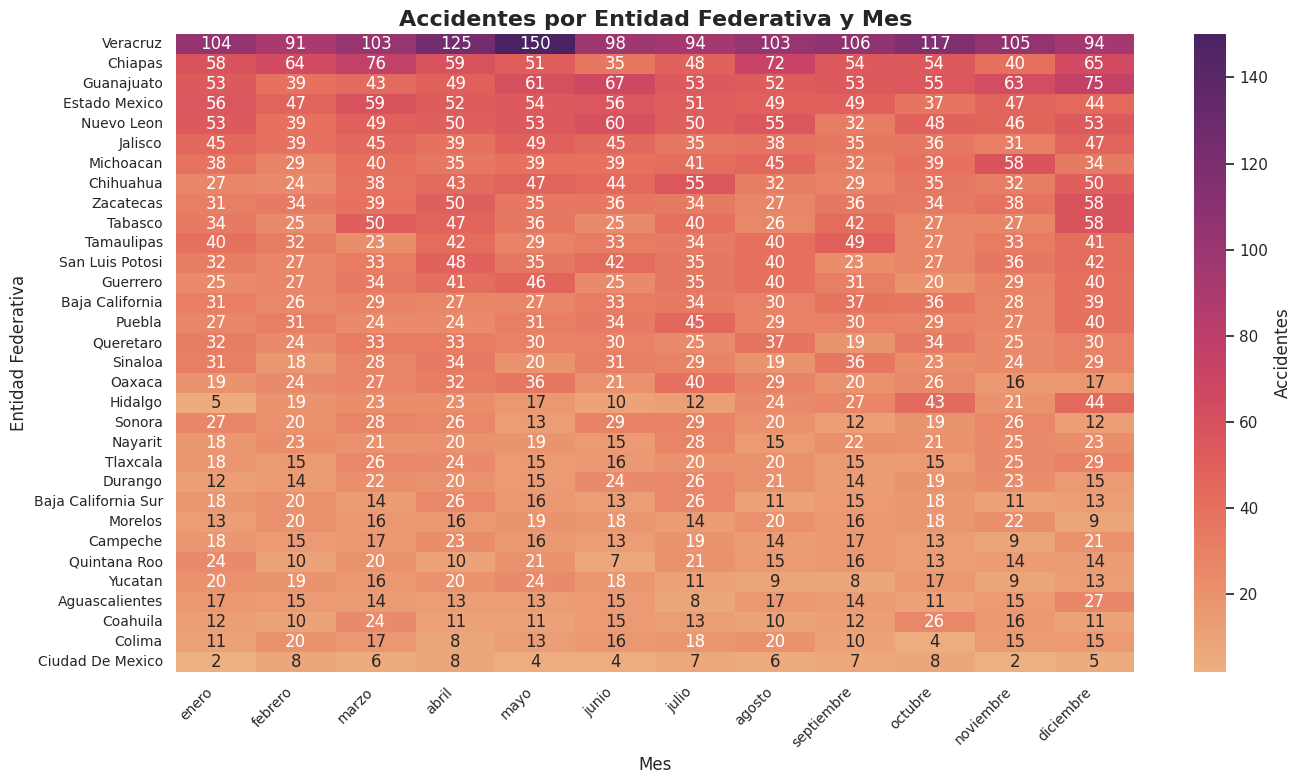

In [17]:
df_heatmap = (
    df.groupby(['entidad_federativa','mes'])['accidentes'].sum().unstack()
)
df_heatmap = df_heatmap.loc[df.groupby('entidad_federativa')['accidentes'].sum().
                            sort_values(ascending=False).index]

orden_meses = [
    'enero','febrero','marzo','abril','mayo','junio',
    'julio','agosto','septiembre','octubre','noviembre','diciembre'
]
df_heatmap = df_heatmap[orden_meses]
plt.figure(figsize=(14,8))
sns.heatmap(
    df_heatmap,
    annot=True,
    cmap='flare',
    fmt='g',
    cbar_kws={'label':'Accidentes'}
)
plt.xlabel('Mes',fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.yticks(rotation=0,fontsize=10)
plt.ylabel('Entidad Federativa',fontsize=12)
plt.title('Accidentes por Entidad Federativa y Mes',fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()

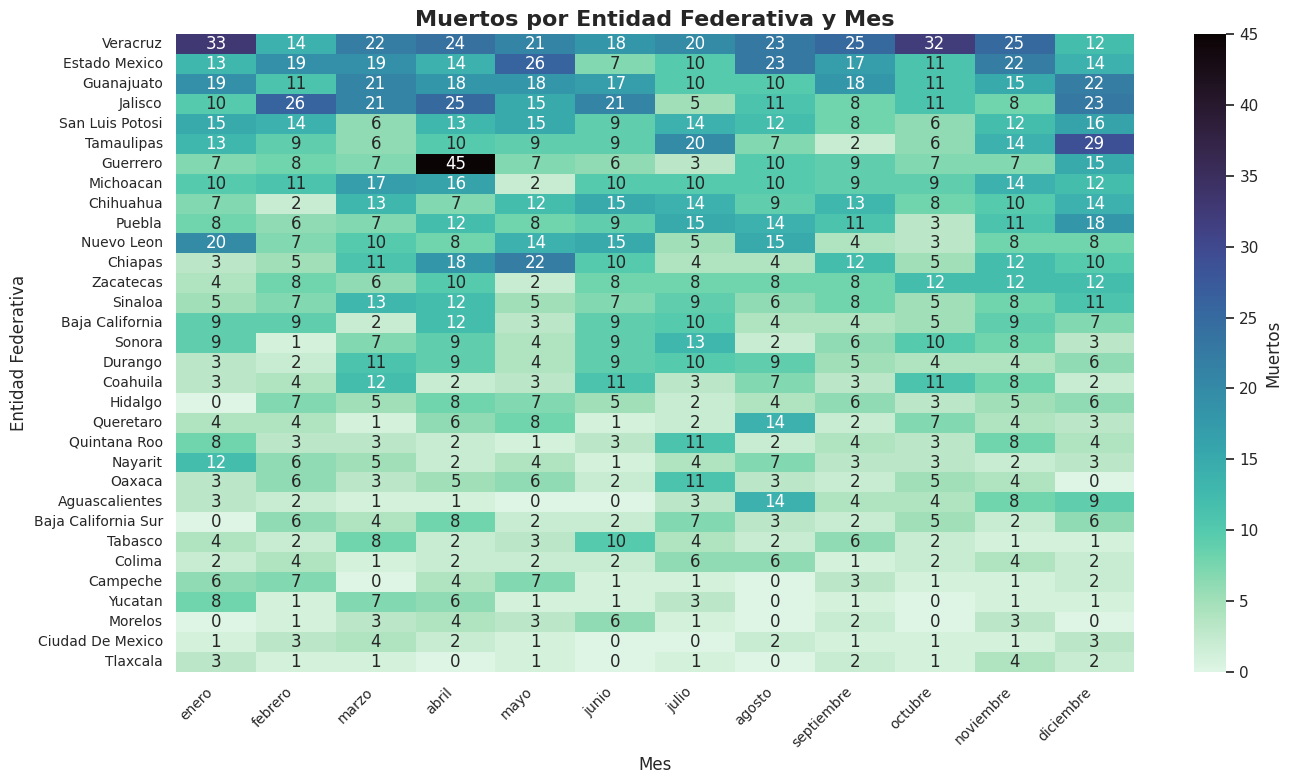

In [23]:
df_heatmap_mu = (
    df.groupby(['entidad_federativa','mes'])['muertos'].sum().unstack()
)
df_heatmap_mu = df_heatmap_mu.loc[df.groupby('entidad_federativa')['muertos'].sum().
                            sort_values(ascending=False).index]
df_heatmap_mu = df_heatmap_mu[orden_meses]
plt.figure(figsize=(14,8))
sns.heatmap(
    df_heatmap_mu,
    annot=True,
    cmap='mako_r',
    fmt='g',
    cbar_kws={'label':'Muertos'}
)
plt.xlabel('Mes',fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.yticks(rotation=0,fontsize=10)
plt.ylabel('Entidad Federativa',fontsize=12)
plt.title('Muertos por Entidad Federativa y Mes',fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()

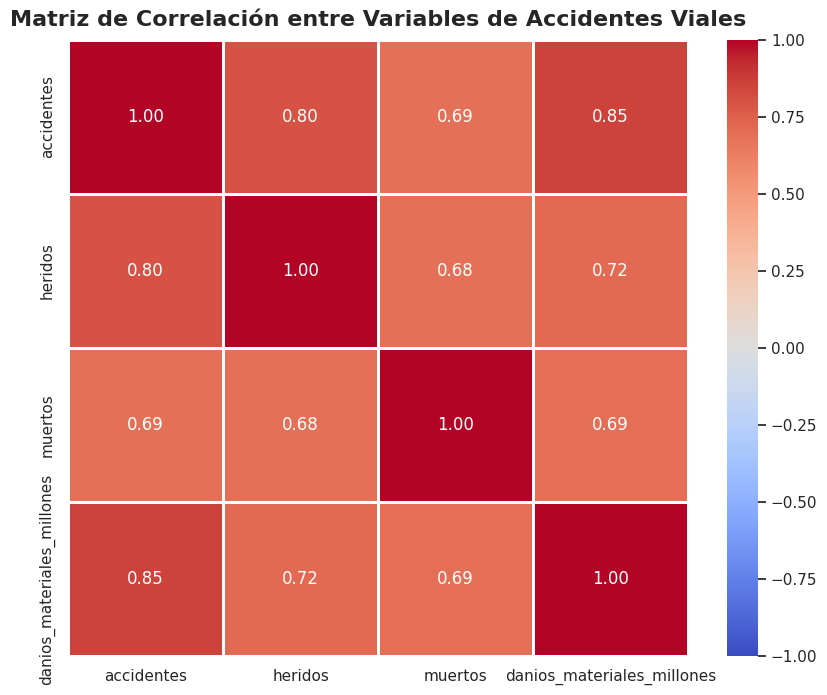

In [48]:
plt.figure(figsize=(10,8))
corr = df[['accidentes','heridos','muertos','danios_materiales_millones']].corr()
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidth=0.8,
    linecolor='white'
)
plt.title('Matriz de Correlación entre Variables de Accidentes Viales',fontsize=16,
          fontweight='bold',pad=10)
plt.show()

<Figure size 1000x600 with 0 Axes>

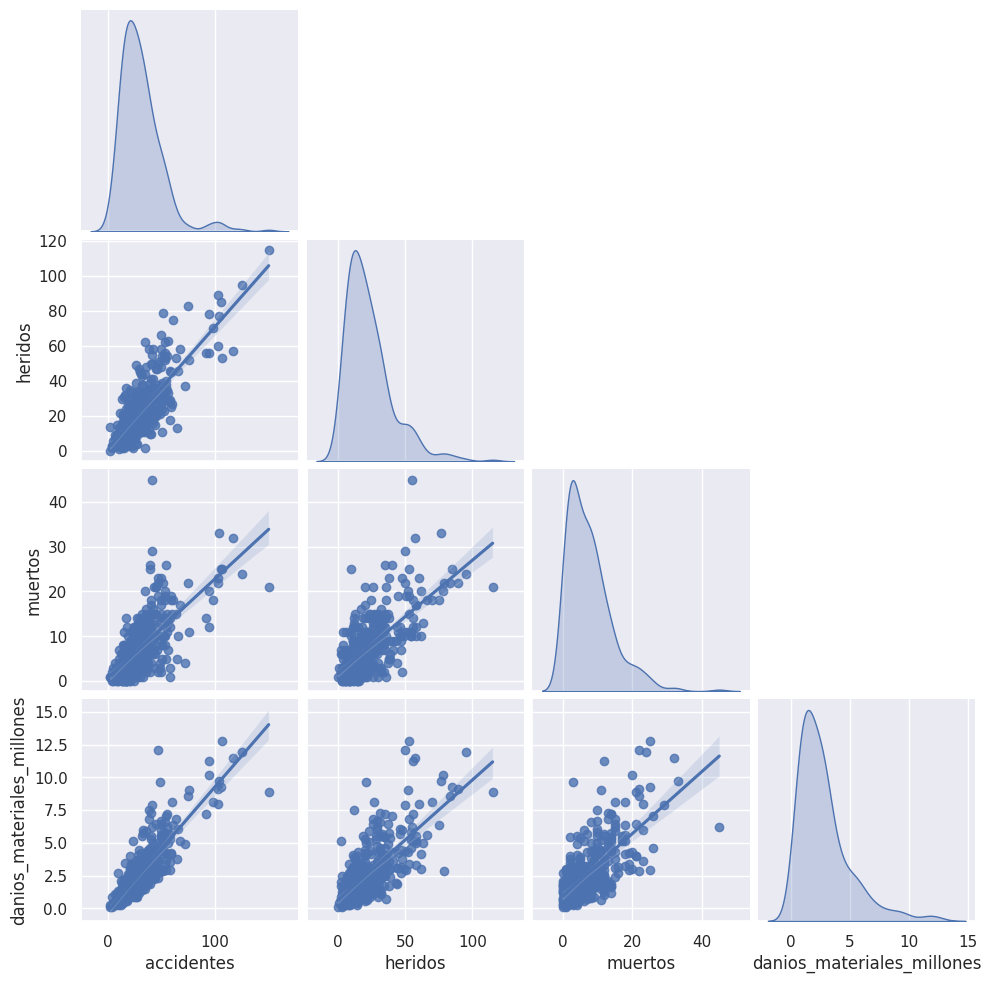

In [54]:
cols = ['accidentes', 'heridos', 'muertos', 'danios_materiales_millones']
plt.figure(figsize=(10,6))
sns.pairplot(
    df[cols],
    kind='reg',
    diag_kind='kde',
    corner=True
)
plt.show()

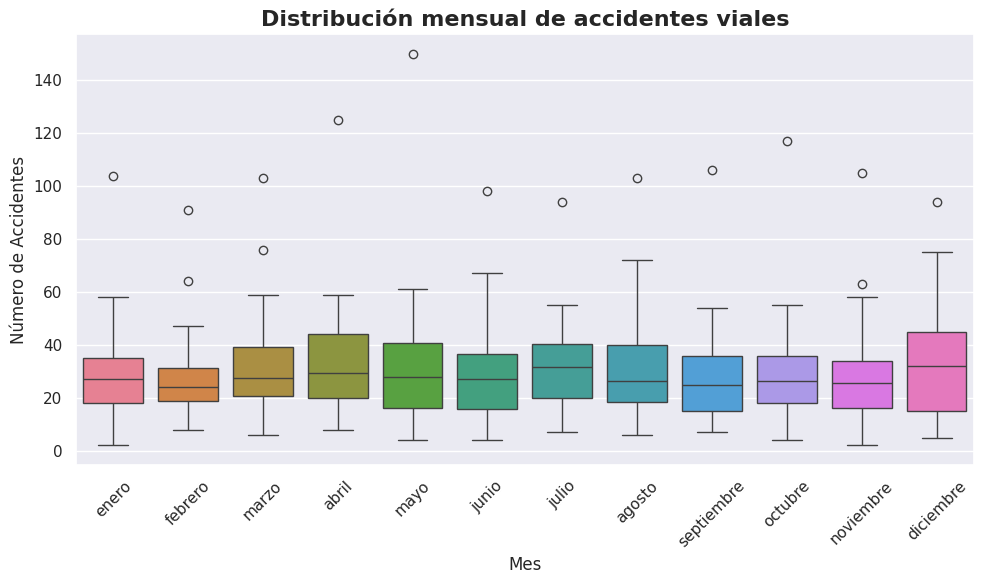

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='mes',
    y='accidentes',
    hue='mes'
)
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Número de Accidentes')
plt.title('Distribución mensual de accidentes viales',fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()

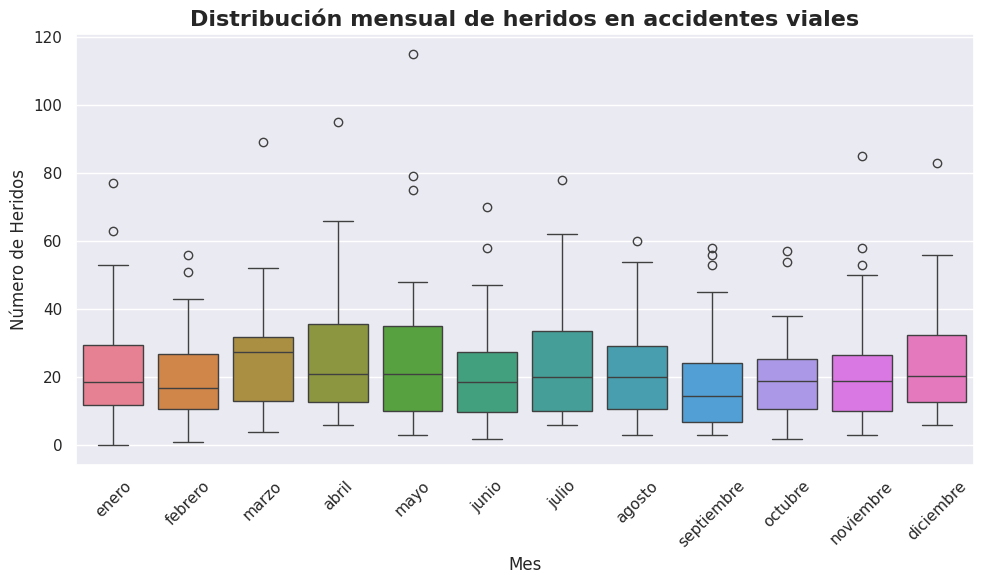

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='mes',
    y='heridos',
    hue='mes'
)
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Número de Heridos')
plt.title('Distribución mensual de heridos en accidentes viales',fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()

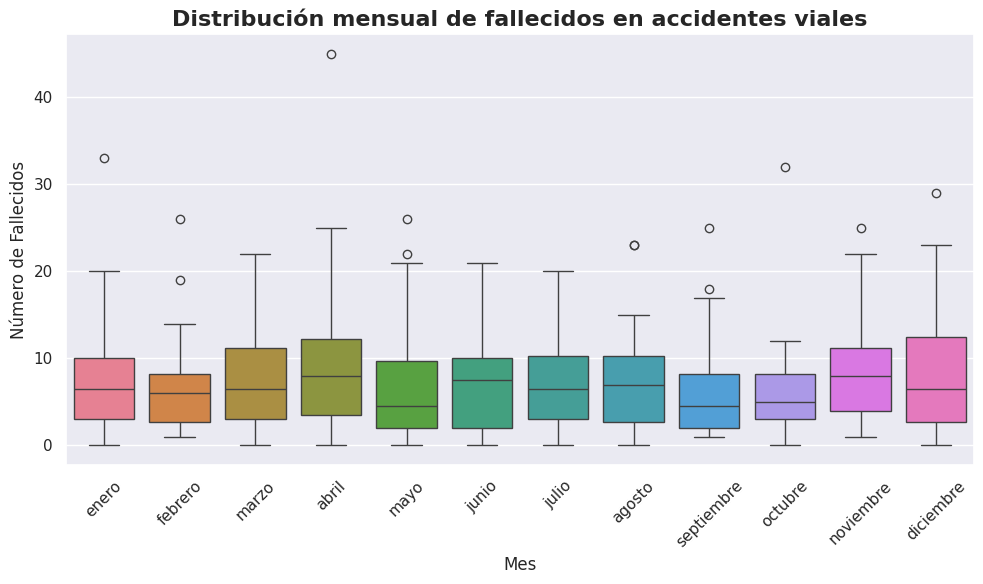

In [75]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='mes',
    y='muertos',
    hue='mes'
)
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Número de Fallecidos')
plt.title('Distribución mensual de fallecidos en accidentes viales',fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()

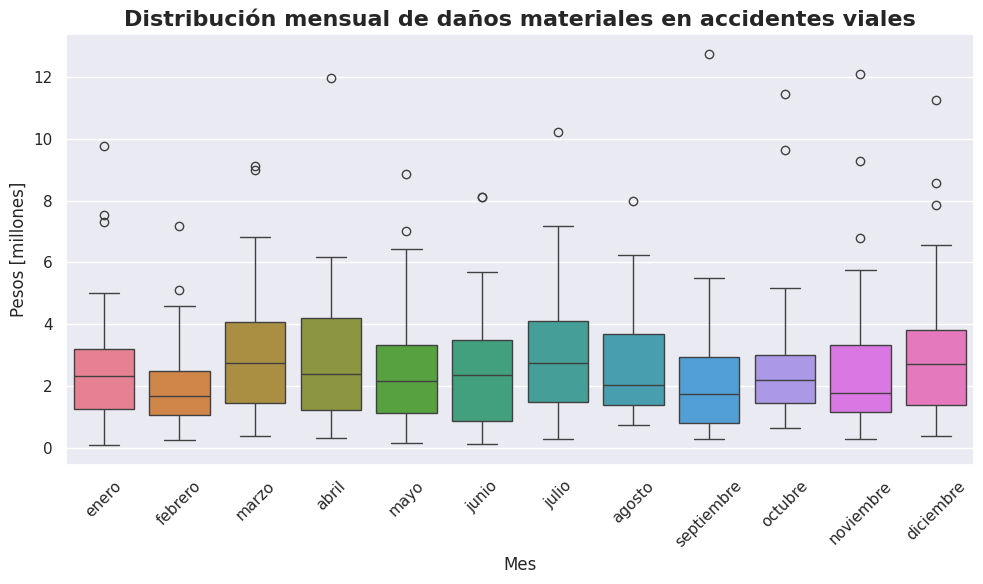

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='mes',
    y='danios_materiales_millones',
    hue='mes'
)
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Pesos [millones]')
plt.title('Distribución mensual de daños materiales en accidentes viales',fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()